# Ho-Lee Short Rate Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mcc import HoLeeModel

In [2]:
dategrid = np.arange(
    np.datetime64("2020-01-01"),
    np.datetime64("2024-12-01"),
    30,
    dtype="datetime64[D]",
)
yearfractions = (dategrid - dategrid[0]).astype(np.float64) / 365
rnd = np.random.RandomState(seed=123)
n = 100
sigma = 0.03
rate = 0.02

In [3]:
def discount_curve(t):
    return np.exp(-rate * t)

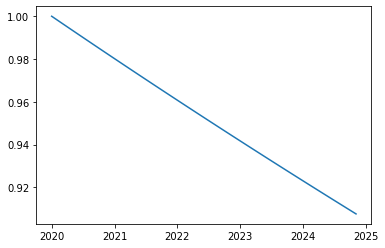

In [4]:
plt.plot(dategrid, discount_curve(yearfractions));

In [5]:
hl = HoLeeModel(dategrid, discount_curve, sigma, n, rnd, True)
hl.shortrates[:10,-1]

array([ 0.08240962, -0.00248738,  0.0662582 , -0.05785908, -0.03518299,
       -0.05380705, -0.05254617,  0.08066188,  0.08367314,  0.0872454 ])

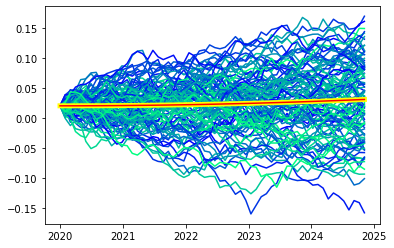

In [6]:
colormap = plt.cm.winter
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, 20))))

plt.plot(dategrid, hl.shortrates.T);
plt.plot(dategrid, hl.mu_t(yearfractions), linewidth=5, color="yellow");
plt.plot(dategrid, hl.shortrates.mean(axis=0), color="red");

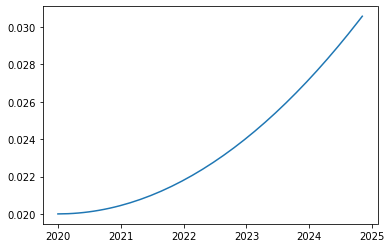

In [7]:
finegrid = np.arange(
    dategrid[0],
    dategrid[-1],
    1,
    dtype="datetime64[D]",
)
fineyearfractions = (finegrid - finegrid[0]).astype(np.float64) / 365
plt.plot(finegrid, hl.mu_t(fineyearfractions));

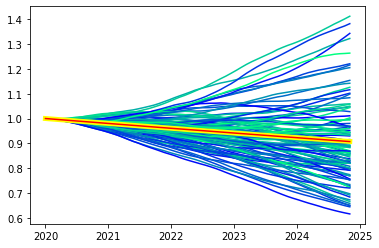

In [8]:
colormap = plt.cm.winter
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, 20))))

plt.plot(dategrid, hl.discount_factors().T);
plt.plot(dategrid, hl.discount_curve(yearfractions), linewidth=5, color="yellow");
plt.plot(dategrid, hl.discount_factors().mean(axis=0), color="red");

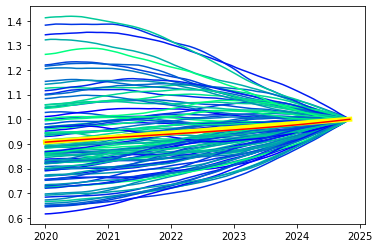

In [9]:
colormap = plt.cm.winter
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, 20))))

plt.plot(dategrid, hl.pathwise_terminal_bond().T);
plt.plot(dategrid, hl.discount_curve(yearfractions)[::-1], linewidth=5, color="yellow");
plt.plot(dategrid, hl.pathwise_terminal_bond().mean(axis=0), color="red");

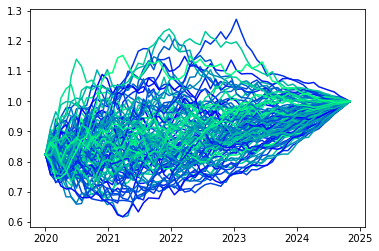

In [10]:
colormap = plt.cm.winter
plt.gca().set_prop_cycle(plt.cycler('color', colormap(np.linspace(0, 1, 20))))

plt.plot(dategrid, hl.bond_prices(yearfractions[-1]).T);